In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
anamnesises = open('data/all_anamnesises.txt').read().split('\n\t')
anamnesises = pd.Series(anamnesises)

In [37]:
from string import punctuation

In [38]:
def normilize_text(series):
    def is_word(word):
        return word.isalpha()
    
    texts_without_punct = series.apply(lambda x: "".join([a for a in x if not a in punctuation]))
    words = series.apply(lambda x: " ".join([word for word in x.split() if is_word(word)]))
    
    return words

In [39]:
from collections import Counter

In [40]:
all_text = ' '.join(anamnesises.to_list())

In [41]:
all_text = all_text.translate(str.maketrans('', '', punctuation))

In [42]:
all_text[:100]

' С 1986 страдает ИБС СН Перенес 2 ОИМ в 86г 97г Последнее ухудшение с конца мая 2010 г 2505 и 106 от'

In [43]:
all_text = ''.join(filter(lambda x: x.isalpha() or x == ' ', all_text))

In [44]:
abbr_info = Counter(filter(lambda x: x.isupper() and len(x) > 1, all_text.split())).most_common()

In [46]:
abbr_df = pd.DataFrame(abbr_info, columns=['abbr', 'abbr_count'])

In [47]:
import numpy as np

In [48]:
abbr_len = abbr_df.abbr.apply(len).to_list()
len_perc_25, len_perc_75 = np.percentile(abbr_len, [0, 60])
high_len = len_perc_75 + 1.5 * (len_perc_75 - len_perc_25)

In [49]:
abbr_df['len'] = abbr_df.abbr.apply(len)
abbr_df['outlier'] = abbr_df.len > high_len

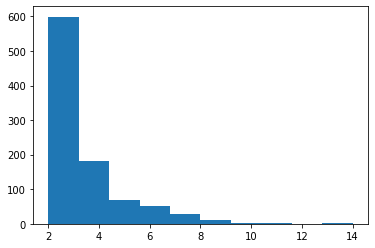

In [50]:
height, x, _ = plt.hist(abbr_df.len)
x = x[:-1]

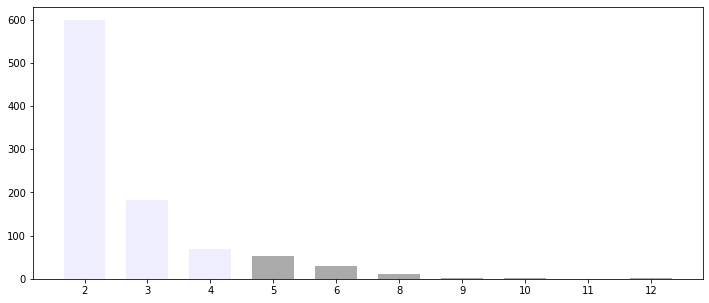

In [51]:
colors = ['#EEEEFF' if i <= high_len else '#AAAAAA' for i in x]
plt.figure(figsize=(12, 5))
plt.bar(x, height, color=colors)
plt.xticks(x, map(int, x))
plt.show()

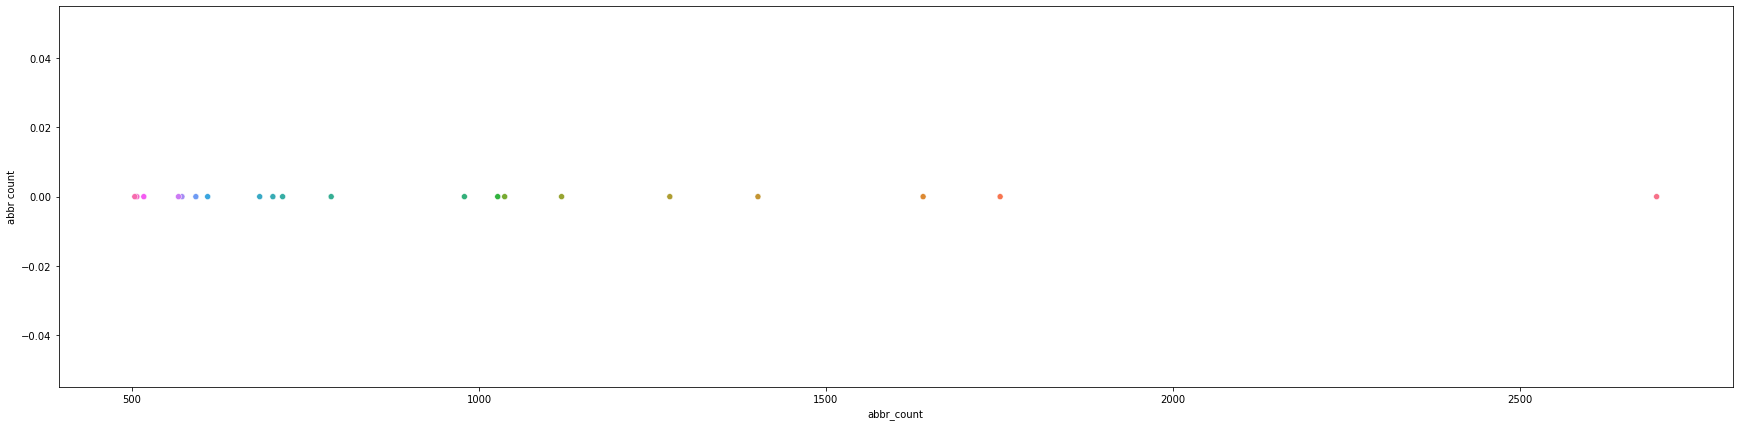

In [81]:
plt.figure(figsize=(30, 7))
sns.scatterplot(
    x='abbr_count',
    y=[0 for i in range(abbr_df[abbr_df.abbr_count > 500].shape[0])],
    data=abbr_df[abbr_df.abbr_count > 500],
    hue='abbr',
    legend=False,
)
plt.ylabel('abbr count')
plt.show()

In [84]:
abbr_df[abbr_df.abbr_count > 500].abbr.value_counts().shape

(20,)

In [82]:
abbr_df.head(30)

,abbr,abbr_count,len,outlier
0,АД,2697,2,False
1,ПМЖА,1751,4,False
2,КАГ,1640,3,False
3,ПКА,1402,3,False
4,ЭКГ,1275,3,False
5,ИМ,1119,2,False
6,ОА,1037,2,False
7,ЛЖ,1027,2,False
8,ИБС,979,3,False
9,ГБ,787,2,False


In [18]:
abbr_df = abbr_df.sort_values('count', ascending=False)

In [19]:
abbr_df['count'][:200].sum() / abbr_df['count'].sum()

0.946539299480476

In [20]:
from collections import defaultdict

In [21]:
def extract_abbrs(filename):
    abbr_variants = defaultdict(list)
    
    with open(filename) as f:
        for line in f:
            abbr, *variants = line.split('\t')
            
            abbr_variants[abbr] = variants
            
    return abbr_variants

In [22]:
abbr_variants = extract_abbrs('data/abbr_by_first_letters.txt')

In [23]:
for abbr in abbr_df['abbr']:
    print('Аббревиатура', abbr)
    print('Варианты расшифровки:', abbr_variants[abbr], '\n')

Аббревиатура АД
Варианты расшифровки: ['артериальное давление', 'альвеолярная дуга', 'анизотропный диск', 'ангина дифтерийная', 'амплитуда движений', 'аналептики дыхательные', 'автоматизированные действия', 'азотистый дефицит', 'Ахутина доступ', 'амеба дизентерийная', 'аденома деструирующая', 'аклазия диафизарная', 'антибактериальное действие', 'аффективная диссоциация', 'амиотрофия диабетическая', 'Альбаррана доступ', 'атриовентрикулярная диссоциация', 'Алибера дерматолиз', 'ангина Дюге', 'антиген-диагностикум', 'антигенное депо\n'] 

Аббревиатура ПМЖА
Варианты расшифровки: [] 

Аббревиатура КАГ
Варианты расшифровки: ['Кальбаума абстрактные галлюцинации', 'Кальбаума апперцептивные галлюцинации', 'Клейста апатическая гебефрения\n'] 

Аббревиатура ПКА
Варианты расшифровки: [] 

Аббревиатура ЭКГ
Варианты расшифровки: ['Эрлиха квасцовый гематоксилин\n'] 

Аббревиатура ИМ
Варианты расшифровки: ['Иванова мышца', 'историография медицинская', 'Ильки метод', 'интоксикация метафизическая', 'инъ

In [86]:
abbr = abbr_df[abbr_df.abbr_count > 500]

In [101]:
idx2abbr = abbr.groupby('abbr').head(1).abbr
abbr2idx = {u: i for i, u in enumerate(idx2abbr)}

In [102]:
anamnesises.head()

0     С 1986 страдает ИБС, СН. Перенес 2 ОИМ в 86г,...
1     Более 10 лет артериальная гипертензия. Максим...
2     Пациент, 74 лет, с длительным анамнезом гипер...
3     С 2006 года артериальная гипертензия. Максима...
4      Считал себя здоровым. АД при редких измерени...
dtype: object

In [103]:
normilized_anamnesises = normilize_text(anamnesises)

In [125]:
abbr_in_text = []
new_texts = []

for ind, text in enumerate(normilized_anamnesises):
    new_text = ""
    
    for word in text.split():
        if word in abbr2idx:
            new_text += " {" + word + "}"
            abbr_in_text.append((ind, word))
        else:
            new_text += " " + word
    
    new_texts.append(new_text)

In [130]:
df_terms = pd.DataFrame(abbr_in_text, columns=['text_id', 'abbr',])
df_terms['doc_text'] = df_terms.text_id.apply(lambda x: new_texts[x]).str.lower()

In [131]:
df_terms.head()

,text_id,abbr,doc_text
0,0,ОИМ,с страдает перенес {оим} в последнее ухудшени...
1,1,АД,более лет артериальная максимальные цифры {ад...
2,1,АД,более лет артериальная максимальные цифры {ад...
3,1,ПКА,более лет артериальная максимальные цифры {ад...
4,2,ФЦСКЭ,с длительным анамнезом гипертонической фактор...


In [156]:
unique_texts_df = df_terms.drop_duplicates('text_id')
unique_texts_df = unique_texts_df[unique_texts_df.abbr != 'АД']

In [157]:
unique_texts_df.head()

,text_id,abbr,doc_text
0,0,ОИМ,с страдает перенес {оим} в последнее ухудшени...
4,2,ФЦСКЭ,с длительным анамнезом гипертонической фактор...
31,7,ГБ,пациентка лет с давним анамнезом {гб} {ад} ма...
43,8,ИБС,пациентка лет длительно страдает {ибс} с года...
59,10,ФЦСКЭ,длительное время история инфарктов не в в свя...


In [162]:
unique_texts_df.abbr.value_counts()

ГБ       287
ИБС      244
ЭКГ      103
ИМ        78
ФЦСКЭ     71
ОИМ       51
КАГ       42
СМП       35
ОНМК      31
ФМИЦ      30
ПМЖА      25
ST        24
РТСА      18
ЛЖ        14
ПКА       12
ЭХОКГ      6
ДА         4
ФВ         3
ОА         2
Name: abbr, dtype: int64

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [134]:
class AbbreviationDecoder:
    own_attributes = ['model', 'window', 'use_abbr_letters']
    
    def __init__(self, model, window=None, use_abbr_letters=True, **kwargs):
        """
        model: sklearn модель
        window: количество слов, рассматриваемая справа и слева аббревиатуры
        use_abbr_letters: нужно ли использовать буквы аббревиатур
        """
        
        self.window = window
        self.use_abbr_letters = use_abbr_letters
        
        self.model = model
        self.model.set_params(**kwargs)
        
    def init_chars(self, X_train):
        """ Зададим каждому символу уникальный id. """
        self.idx2char = sorted(set("".join(X_train.to_list())))
        self.char2idx = {u:i for i, u in enumerate(self.idx2char)}
        
    def vectorize_abbr(self, abbr):
        vector = np.zeros(len(self.idx2char))
        
        for a in abbr:
            vector[self.char2idx[a]] = 1
            
        return vector
    
    def get_before_abbr_after_text(self, text):
        text_before = ""
        text_after = ""
        text_abbr = ""
        
        fl_code = 0
        
        for ch in text:
            if ch == "{":
                fl_code = 1
            elif ch == "}":
                fl_code = 2
                
            elif fl_code == 0:
                text_before += ch
            elif fl_code == 1:
                text_abbr += ch
            elif fl_code == 2:
                text_after += ch
        
        if self.window:
            text_before = " ".join(text_before.split()[-self.window:])
            text_after = " ".join(text_after.split()[:self.window])
            
        return text_before, text_abbr, text_after
    
    
    def get_text_features(self, x_before, x_abbrs, x_after, fit=False):
        
        if fit:
            self.before_vectorizer = TfidfVectorizer(max_features=200)
            self.after_vectorizer = TfidfVectorizer(max_features=200)
            
            self.before_vectorizer.fit(x_before)
            self.after_vectorizer.fit(x_before)
            
        before_features = self.before_vectorizer.transform(x_before).toarray()
        after_features  = self.after_vectorizer.transform(x_after).toarray()
        
        sample_train = np.hstack((before_features, after_features))
        
        if self.use_abbr_letters:
            sample_train = np.hstack((sample_train, x_abbrs))
            
        return sample_train
    
    def get_vectorized_data(self, data, fit=False):
        x_before = []
        x_abbrs = []
        x_after = []
        
        for sample in data:
            x_b, x_abbr, x_a = self.get_before_abbr_after_text(sample)
            x_before.append(x_b)
            x_abbrs.append(self.vectorize_abbr(x_abbr))
            x_after.append(x_a)
        
        data = self.get_text_features(x_before, x_abbrs, x_after, fit)
        
        return data
    
    
    def fit(self, X_train, y_train):
        """
        X_train - it's a text with encoded abbreviations in brakets
        Y_train - abbreavation decode.
        
        Example:
        ['удовлетворительный наполнение и напряжение. {вт} систолический шум на верхушка.']
        ['верхушечный толчок']
        """
        
        self.init_chars(X_train)
        data_train = self.get_vectorized_data(X_train, fit=True)
        self.model.fit(data_train, y_train)
        
        return self
    
    def predict(self, X_test):
        test_data = self.get_vectorized_data(X_test)
            
        return self.model.predict(test_data)
    
    def predict_proba(self, X_test):
        test_data = self.get_vectorized_data(X_test)
        
        return self.model.predict_proba(test_data)
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test).reshape(-1, )
        
        return sum(y_pred == y_test) / len(y_test)
    
    def __repr__(self):
        return 'Abbreviation decoder with model:\n' + str(self.model)
    
    def get_params(self, **params):
        out_params = self.model.get_params(**params)
        
        out_params.update({
            'model': self.model,
            'window' : self.window,
            'use_abbr_letters': self.use_abbr_letters
        })
        
        return out_params
    
    def set_params(self, **params):
        print(params)
        if not params:
            return self
        
        for attr in self.own_attributes:
            if attr in params:
                setattr(self, attr, params[attr])
                
            params.pop(attr, None)
            
        self.model.set_params(**params)
        
        return self

In [163]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [168]:
model = AbbreviationDecoder(
    model=CatBoostClassifier(verbose=0),
    use_abbr_letters=False,
    window=5
)

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(unique_texts_df.doc_text, unique_texts_df.abbr)

In [171]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

Abbreviation decoder with model:

In [174]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [179]:
v_xgb = XGBClassifier()
v_lgb = RandomForestClassifier()
v_cat = CatBoostClassifier(verbose=0)

v_clf = VotingClassifier(
    estimators=[
        ('xgb', v_xgb), 
        ('lgb', v_lgb), 
        ('cat', v_cat)], 
    voting='soft')

model = AbbreviationDecoder(
    model=v_clf,
    use_abbr_letters=False,
    window=10,
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5740740740740741